Having a set of data pairs (*x, y*), where *y* shows linear dependence on *x*, the line of best fit can be found with 
[simple linear regression]({% link _posts\handbook\statistics\2020-09-16-simple-linear-regression.md %}) model. In this post, I present Pyhton code solving the problem of simple linear regression.
<!--more-->

# Imports and data preparation

First, let's import stuff. Numpy for arangement and easy processing of numerical data, Matplotlib for visualization, and in the and stats modul from Scipy to test if implemented solution works properly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Now, we can arrange an array of independent variable *X*, and calculate values of dependent variable *Y*, assuming some linear dependence. We don't want to get straght line, so a bit of noise is introduced onto *Y*.

In [2]:
X = np.arange(0, 100)
noise = 20 * np.random.normal(size=100)
Y = (3*X+14) + noise

Time to see what we've got.

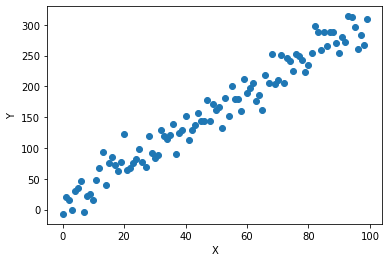

In [3]:
plt.scatter(X, Y)
plt.xlabel('X')
_ = plt.ylabel('Y')

Looks fine. There is clearly linear dependence, however points don't create straight line (due to introduced noise).

# Writing the algorithm

The slope for the line of best fit is given with equation

![a](/assets/images/handbook/statistics/simple_linear_regression_a.gif)

Below function will calculate the value of *a*.

In [4]:
def get_slope(x, y):
    n = len(x)
    xy = x * y
    xx = x * x
    
    sum_x = x.sum()
    sum_y = y.sum()
    sum_xy = xy.sum()
    sum_xx = xx.sum()
    sum_x_sq = sum_x * sum_x
    
    a_output = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x_sq)
    
    return a_output

The value of *b* can be calculated using the slope, which is the output of function ```get_slope```

![b](/assets/images/handbook/statistics/simple_linear_regression_b_by_means.gif)

In [5]:
def get_intercept(x, y, slope):
    return y.mean() - slope * x.mean()

Next three functions are used to calculate the coefficient of determination *R<sup>2</sup>*.

In [6]:
def get_residual_sum_of_squares(y, y_fit):
    squares = (y - y_fit) ** 2
    return squares.sum()

def get_total_sum_of_squares(y):
    squares = (y - y.mean()) ** 2
    return squares.sum()

def get_r_squared(y, y_fit):
    ss_res = get_residual_sum_of_squares(y, y_fit)
    ss_tot = get_total_sum_of_squares(y)
    return (1 - ss_res / ss_tot)

Finally, we can put everthing together and close it in one function ```linear_regression```. The function will return the dictionary with short summary (containing the value of slope, intercept, and R-squared) and set of Numpy arrays with the result of fitting.

In [7]:
def linear_regression(x, y):
    slope = get_slope(x, y)
    intercept = get_intercept(x, y, slope)
    y_fit = slope * x + intercept
    r_squared = get_r_squared(y, y_fit)
    
    summary = {'Slope': slope, 
               'Intercept': intercept,
               'R-squared': r_squared}
    
    return summary, (x, y_fit)

# Running the algoritm

Let's see if implemented code works.

In [8]:
summary, fit = linear_regression(X, Y)
summary

{'Slope': 2.959611239086049,
 'Intercept': 13.001211160835936,
 'R-squared': 0.9529103935021158}

Time to plot the input data and the line of best fit together in one graph.

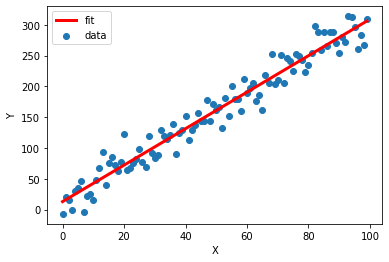

In [9]:
plt.scatter(X, Y)
plt.plot(fit[0], fit[1], c='r', linewidth=3)
plt.legend(['fit', 'data'])
plt.xlabel('X')
_ = plt.ylabel('Y')

Looks really good :-)

# Finall test

We can use ```scipy.stats``` to do linear regression on the same set of data and compare the result with result recieved with implemented model. This will be the fiall check if everthing is correct.

In [10]:
slope, intercept, r_value, *_ = stats.linregress(X, Y)
r_squared = r_value ** 2
summary_stats = {'Slope': slope, 'Intercept': intercept, 'R-squared': r_squared}

Let's put evething to Pandas DataFrame, so it is easier to compare the results.

In [11]:
import pandas as pd

pd.DataFrame(data=[summary, summary_stats], index=['My model', 'Scipy model'])

,Slope,Intercept,R-squared
My model,2.959611,13.001211,0.95291
Scipy model,2.959611,13.001211,0.95291


It works! :D